In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from scipy import stats

In [2]:
file_path = "../Resources.2/natural_disasters_final.csv"
temp_anom_df = pd.read_csv(file_path)
temp_anom_df.head()

,Entity,Year,Number of deaths from drought,Number of deaths from extreme temperatures,Number of deaths from floods,Number of deaths from storms,Number of deaths from wildfires,"Number of people affected by drought per 100,000","Number of people affected by extreme temperatures per 100,000","Number of people affected by floods per 100,000",...,Total economic damages from floods,Total economic damages from floods as a share of GDP,Total economic damages from storms,Total economic damages from storms as a share of GDP,Total economic damages from wildfires,Total economic damages as a share of GDP,Total economic damages,Total economic damages (000USD),"Number of people affected per 100,000",Number of deaths
0,Afghanistan,1971,0,0,0,0,0,0.0,0.0,0.000000,...,0,0.000000,0,0.0,0,0.000000,0,0,0.000000,0
1,Afghanistan,1972,0,0,150,0,0,0.0,0.0,2120.261216,...,0,0.000000,0,0.0,0,0.000000,0,0,2120.261216,150
2,Afghanistan,1976,0,0,51,0,0,0.0,0.0,618.094723,...,0,0.000000,0,0.0,0,0.000000,0,0,618.094723,51
3,Afghanistan,1978,0,0,120,0,0,0.0,0.0,1979.191965,...,52000,1.575758,0,0.0,0,0.393939,52000,52000,1979.191965,120
4,Afghanistan,1980,0,0,0,0,0,0.0,0.0,224.601333,...,0,0.000000,0,0.0,0,0.000000,0,0,224.601333,0


In [3]:
pak_disasters_df= temp_anom_df[(temp_anom_df['Entity'] == 'Pakistan')]
pak_disasters_df.head()

,Entity,Year,Number of deaths from drought,Number of deaths from extreme temperatures,Number of deaths from floods,Number of deaths from storms,Number of deaths from wildfires,"Number of people affected by drought per 100,000","Number of people affected by extreme temperatures per 100,000","Number of people affected by floods per 100,000",...,Total economic damages from floods,Total economic damages from floods as a share of GDP,Total economic damages from storms,Total economic damages from storms as a share of GDP,Total economic damages from wildfires,Total economic damages as a share of GDP,Total economic damages,Total economic damages (000USD),"Number of people affected per 100,000",Number of deaths
2969,Pakistan,1972,0,0,0,0,0,0.0,0.0,0.000000,...,0,0.000000,0,0.0,0,0.000000,0,0,0.000000,0
2970,Pakistan,1973,0,0,474,0,0,0.0,0.0,7607.093615,...,661500,10.362768,0,0.0,0,2.590692,661500,661500,7607.093615,474
2971,Pakistan,1974,0,0,0,0,0,0.0,0.0,0.000000,...,0,0.000000,0,0.0,0,0.000000,0,0,0.000000,0
2972,Pakistan,1975,0,14,0,0,0,0.0,0.0,0.000000,...,0,0.000000,0,0.0,0,0.000000,0,0,0.000000,14
2973,Pakistan,1976,0,0,338,0,0,0.0,0.0,8086.120231,...,505000,3.835031,0,0.0,0,0.958758,505000,505000,8086.120231,338


In [4]:
pak_disasters_df= pak_disasters_df.drop(['Entity'], axis=1)
pak_disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2969 to 3016
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Year                                                                48 non-null     int64  
 1   Number of deaths from drought                                       48 non-null     int64  
 2   Number of deaths from extreme temperatures                          48 non-null     int64  
 3   Number of deaths from floods                                        48 non-null     int64  
 4   Number of deaths from storms                                        48 non-null     int64  
 5   Number of deaths from wildfires                                     48 non-null     int64  
 6   Number of people affected by drought per 100,000                    48 non-null     float64
 7   Number of peop

In [5]:
pak_disasters_df.set_index('Year',inplace = True)
pak_disasters_df.head()

,Number of deaths from drought,Number of deaths from extreme temperatures,Number of deaths from floods,Number of deaths from storms,Number of deaths from wildfires,"Number of people affected by drought per 100,000","Number of people affected by extreme temperatures per 100,000","Number of people affected by floods per 100,000","Number of people affected by storms per 100,000","Number of people affected by wildfires per 100,000",...,Total economic damages from floods,Total economic damages from floods as a share of GDP,Total economic damages from storms,Total economic damages from storms as a share of GDP,Total economic damages from wildfires,Total economic damages as a share of GDP,Total economic damages,Total economic damages (000USD),"Number of people affected per 100,000",Number of deaths
Year,,,,,,,,,,,,,,,,,,,,,
1972,0,0,0,0,0,0.0,0.0,0.000000,0.0,0.0,...,0,0.000000,0,0.0,0,0.000000,0,0,0.000000,0
1973,0,0,474,0,0,0.0,0.0,7607.093615,0.0,0.0,...,661500,10.362768,0,0.0,0,2.590692,661500,661500,7607.093615,474
1974,0,0,0,0,0,0.0,0.0,0.000000,0.0,0.0,...,0,0.000000,0,0.0,0,0.000000,0,0,0.000000,0
1975,0,14,0,0,0,0.0,0.0,0.000000,0.0,0.0,...,0,0.000000,0,0.0,0,0.000000,0,0,0.000000,14
1976,0,0,338,0,0,0.0,0.0,8086.120231,0.0,0.0,...,505000,3.835031,0,0.0,0,0.958758,505000,505000,8086.120231,338


AxesSubplot(0.125,0.125;0.775x0.755)


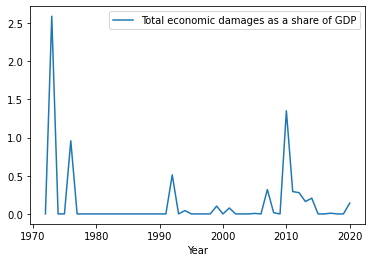

In [6]:
axis = pak_disasters_df.plot.line(y='Total economic damages as a share of GDP',rot=0)
print(axis)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


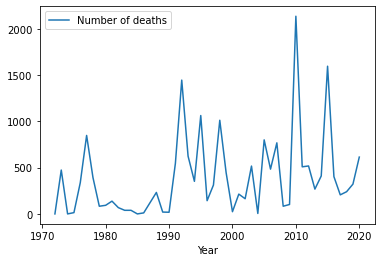

In [7]:
axis = pak_disasters_df.plot.line(y='Number of deaths',rot=0)
print(axis)
plt.show()

In [8]:
pak_disasters_df.columns.tolist()

['Number of deaths from drought',
 'Number of deaths from extreme temperatures',
 'Number of deaths from floods',
 'Number of deaths from storms',
 'Number of deaths from wildfires',
 'Number of people affected by drought per 100,000',
 'Number of people affected by extreme temperatures per 100,000',
 'Number of people affected by floods per 100,000',
 'Number of people affected by storms per 100,000',
 'Number of people affected by wildfires per 100,000',
 'Total economic damages from drought',
 'Total economic damages from drought as a share of GDP',
 'Total economic damages from extreme temperatures',
 'Total economic damages from extreme temperatures as a share of GDP',
 'Total economic damages from floods',
 'Total economic damages from floods as a share of GDP',
 'Total economic damages from storms',
 'Total economic damages from storms as a share of GDP',
 'Total economic damages from wildfires',
 'Total economic damages as a share of GDP',
 'Total economic damages',
 'Total eco

In [9]:
pak_disasters_df = pak_disasters_df.drop([
 'Number of deaths from drought',
 'Number of deaths from extreme temperatures',
 'Number of deaths from floods',
 'Number of deaths from storms',
 'Number of deaths from wildfires',
 'Number of people affected by drought per 100,000',
 'Number of people affected by extreme temperatures per 100,000',
 'Number of people affected by floods per 100,000',
 'Number of people affected by storms per 100,000',
 'Number of people affected by wildfires per 100,000',
 'Total economic damages from drought',
 'Total economic damages from drought as a share of GDP',
 'Total economic damages from extreme temperatures',
 'Total economic damages from extreme temperatures as a share of GDP',
 'Total economic damages from floods',
 'Total economic damages from floods as a share of GDP',
 'Total economic damages from storms',
 'Total economic damages from storms as a share of GDP',
 'Total economic damages from wildfires',
 'Total economic damages (000USD)',
 'Total economic damages'], axis=1)
pak_disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1972 to 2020
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Total economic damages as a share of GDP  48 non-null     float64
 1   Number of people affected per 100,000     48 non-null     float64
 2   Number of deaths                          48 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


In [10]:
pak_disasters_df= pak_disasters_df.sort_values('Total economic damages as a share of GDP',ascending=False)
pak_disasters_df.head(5)

,Total economic damages as a share of GDP,"Number of people affected per 100,000",Number of deaths
Year,,,
1973,2.590692,7607.093615,474
2010,1.351840,11349.896010,2136
1976,0.958758,8086.120231,338
1992,0.511526,8680.946528,1446
2007,0.319438,984.756388,768


In [11]:
pak_disasters_df= pak_disasters_df.sort_values('Number of deaths',ascending=False)
pak_disasters_df.head(5)

,Total economic damages as a share of GDP,"Number of people affected per 100,000",Number of deaths
Year,,,
2010,1.351840,11349.896010,2136
2015,0.000092,790.760999,1596
1992,0.511526,8680.946528,1446
1995,0.000000,1498.662918,1063
1998,0.000000,148.320631,1012


In [12]:
pak_disasters_df= pak_disasters_df.sort_values('Number of people affected per 100,000',ascending=False)
pak_disasters_df.head(5)

,Total economic damages as a share of GDP,"Number of people affected per 100,000",Number of deaths
Year,,,
2014,0.206457,19295.409800,410
2010,1.351840,11349.896010,2136
1992,0.511526,8680.946528,1446
1976,0.958758,8086.120231,338
1973,2.590692,7607.093615,474


In [13]:
pak_disasters_df.describe()

,Total economic damages as a share of GDP,"Number of people affected per 100,000",Number of deaths
count,48.000000,48.000000,48.000000
mean,0.147265,1731.409646,398.666667
std,0.438863,3634.765701,449.516257
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,79.250000
50%,0.000000,158.854084,290.000000
75%,0.052330,1243.580572,517.250000
max,2.590692,19295.409800,2136.000000


1. Total economic damages as a share of GDP Analysis

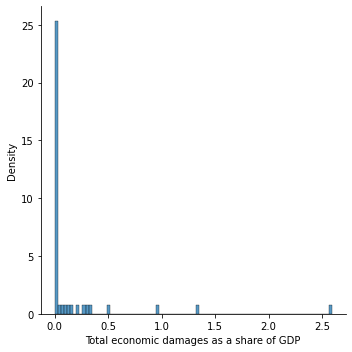

In [14]:
# Extract feature we're interested in
data_1 = pak_disasters_df['Total economic damages as a share of GDP']

# Generate histogram/distribution plot
sb.displot(data_1, stat="density")

plt.show()

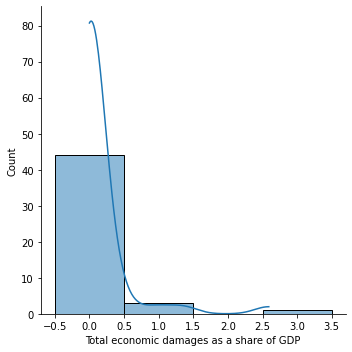

In [15]:
sb.displot(data_1, discrete = True, kde = True)
plt.show()

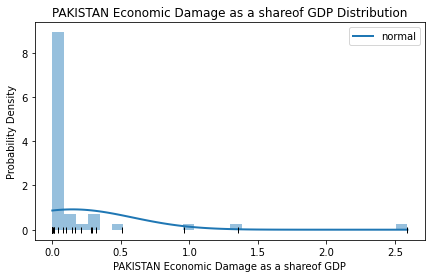

In [16]:
# Histogram
# ==============================================================================
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data_1)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data_1), max(data_1), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data_1, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_1, np.full_like(data_1, -0.01), '|k', markeredgewidth=1)
ax.set_title('PAKISTAN Economic Damage as a shareof GDP Distribution')
ax.set_xlabel('PAKISTAN Economic Damage as a shareof GDP')
ax.set_ylabel('Probability Density')
ax.legend();

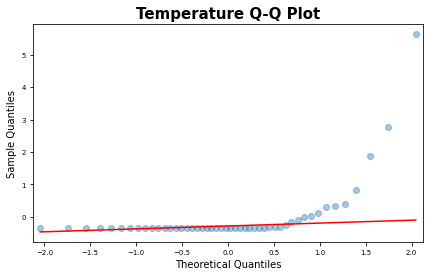

In [17]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data_1,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Temperature Q-Q Plot', fontsize = 15,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [18]:
print('Kursotis:', stats.kurtosis(data_1))
print('Skewness:', stats.skew(data_1))

Kursotis: 19.38802361097937
Skewness: 4.278166974770001


In [19]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(data_1)
shapiro_test

ShapiroResult(statistic=0.3842843770980835, pvalue=6.586974889144503e-13)

In [20]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(data_1)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 76.61903493067626, p-value = 2.3034986413196438e-17
